In [2]:
# all datasets exploration of the acc relationship fo the heterogeneity of the partitions and acc on the test set.


# 1. Load the Hellinger Distance results (heterogeneity measure)

In [3]:
import pandas as pd
import numpy as np
from IPython.display import display
import dataframe_image as dfi

In [4]:
SAVE_RESULTS = False

In [5]:
res_dict = {}
corrs = {}

In [6]:

partitioner_name = "IidPartitioner"
for ds_name in ["mnist", "cifar10", "cifar100"]:
    # ds_name = "cifar10"
    # partitioning_scheme = "DirichletPartitioner"
    path = f"/home/FL-heterogeneity/results-heterogeneity/{ds_name}/{partitioner_name}/compute_hellinger_distance.csv"
    metrics = pd.read_csv(path)
    metrics = metrics.drop_duplicates()
    # print(f"{ds_name}")
    hetero = metrics.groupby(["num_partitions"])["metric_value"].mean().to_frame()
    # display(hetero.style.background_gradient(axis=None))
    path_acc = f"/home/FL-heterogeneity/results/res10092024/" + f"{ds_name}/{partitioner_name}/Adam" + "{}" + "/test_res.csv"
    acc = pd.read_csv(path_acc)
    acc = acc[["num_partitions", "eval/acc"]]
    if SAVE_RESULTS:
        dfi.export(acc.loc[:, ["num_partitions", "eval/acc"]].set_index("num_partitions").style.background_gradient(subset="eval/acc", vmin=0, vmax=1, cmap="Greens"), f"/home/FL-heterogeneity/plots/acc/{ds_name}_{partitioner_name}_fest_acc_df.png", table_conversion="matplotlib")
    # print("acc")
    # display(acc)
    res = acc.merge(hetero, on=["num_partitions"])
    print(f"{ds_name}, {partitioner_name}")
    res_dict[(ds_name, partitioner_name)] = res
    display(res)
    corr = res['eval/acc'].corr(res['metric_value'])
    corrs[(ds_name, partitioner_name)] = corr
    print(f"{ds_name}, {partitioner_name} correlation: {corr}")
    

mnist, IidPartitioner


,num_partitions,eval/acc,metric_value
0,3,0.9902,0.005481
1,10,0.9906,0.012979
2,30,0.9853,0.023203
3,100,0.9814,0.041930
4,300,0.9738,0.073407
5,1000,0.9509,0.139402


mnist, IidPartitioner correlation: -0.9949558781717589
cifar10, IidPartitioner


,num_partitions,eval/acc,metric_value
0,3,0.6088,0.006195
1,10,0.5715,0.014177
2,30,0.5258,0.023834
3,100,0.4874,0.045574
4,300,0.4839,0.079977
5,1000,0.4433,0.155471


cifar10, IidPartitioner correlation: -0.8644174866735602
cifar100, IidPartitioner


,num_partitions,eval/acc,metric_value
0,3,0.2592,0.022335
1,10,0.2289,0.047788
2,30,0.1858,0.085924
3,100,0.1610,0.168592
4,300,0.1668,0.358407
5,1000,0.0824,0.618352


cifar100, IidPartitioner correlation: -0.912233574566946


In [7]:
partitioner_name = "DirichletPartitioner"
for ds_name in ["mnist", "cifar10", "cifar100"]:
    # ds_name = "cifar10"
    # partitioning_scheme = "DirichletPartitioner"
    path = f"/home/FL-heterogeneity/results-heterogeneity/{ds_name}/{partitioner_name}/compute_hellinger_distance.csv"
    metrics = pd.read_csv(path)
    metrics = metrics.drop_duplicates()
    # print(f"{ds_name}")
    hetero = metrics.groupby(["num_partitions", "alpha"])["metric_value"].mean().to_frame()
    # display(hetero.style.background_gradient(axis=None))
    path_acc = f"/home/FL-heterogeneity/results/res10092024/" + f"{ds_name}/{partitioner_name}/Adam" + "{}" + "/test_res.csv"
    acc = pd.read_csv(path_acc)
    acc = acc[["num_partitions", "alpha", "eval/acc"]]
    if SAVE_RESULTS:
        dfi.export(acc.loc[:, ["num_partitions", "alpha", "eval/acc"]].set_index(["num_partitions", "alpha"]).unstack().style.background_gradient(subset="eval/acc", vmin=0, vmax=1, cmap="Greens"), f"/home/FL-heterogeneity/plots/acc/{ds_name}_{partitioner_name}_fest_acc_df.png", table_conversion="matplotlib")
  
    # print("acc")
    # display(acc)
    res = acc.merge(hetero, on=["num_partitions", "alpha"])
    res_dict[(ds_name, partitioner_name)] = res
    print(f"{ds_name}, {partitioner_name}")
    display(res)
    corr = res['eval/acc'].corr(res['metric_value'])
    corrs[(ds_name, partitioner_name)] = corr
    print(f"{ds_name}, {partitioner_name} correlation: {corr}")

mnist, DirichletPartitioner


,num_partitions,alpha,eval/acc,metric_value
0,3,0.1,0.8852,0.520301
1,3,0.3,0.9867,0.388463
2,3,1.0,0.9884,0.250478
3,3,3.0,0.9907,0.141928
4,3,10.0,0.9912,0.078216
5,3,100.0,0.9892,0.025358
6,3,1000.0,0.9908,0.008000
7,10,0.1,0.9463,0.620323
8,10,0.3,0.9884,0.482991
9,10,1.0,0.9899,0.282998


mnist, DirichletPartitioner correlation: -0.40476658490279394
cifar10, DirichletPartitioner


,num_partitions,alpha,eval/acc,metric_value
0,3,0.1,0.5169,0.520317
1,3,0.3,0.5492,0.388491
2,3,1.0,0.5990,0.249940
3,3,3.0,0.6099,0.141503
4,3,10.0,0.6099,0.078354
5,3,100.0,0.6061,0.025434
6,3,1000.0,0.6075,0.008023
7,10,0.1,0.4469,0.620250
8,10,0.3,0.5114,0.483452
9,10,1.0,0.5628,0.283198


cifar10, DirichletPartitioner correlation: -0.5798780599968432
cifar100, DirichletPartitioner


,num_partitions,alpha,eval/acc,metric_value
0,3,0.1,0.1301,0.545902
1,3,0.3,0.1937,0.432712
2,3,1.0,0.2556,0.264131
3,3,3.0,0.2697,0.168904
4,3,10.0,0.2624,0.093807
5,3,100.0,0.2859,0.029856
6,3,1000.0,0.2769,0.009441
7,10,0.1,0.1423,0.665189
8,10,0.3,0.1936,0.513564
9,10,1.0,0.2273,0.319783


cifar100, DirichletPartitioner correlation: -0.6944900784158843


In [8]:
partitioner_name = "PathologicalPartitioner"
for ds_name in ["mnist", "cifar10", "cifar100"]:
    path = f"/home/FL-heterogeneity/results-heterogeneity/{ds_name}/{partitioner_name}/compute_hellinger_distance.csv"
    metrics = pd.read_csv(path)
    metrics = metrics.drop_duplicates()
    # print(f"{ds_name}")
    hetero = metrics.groupby(["num_partitions", "num_classes_per_partition"])["metric_value"].mean().to_frame()
    # display(hetero.style.background_gradient(axis=None))
    path_acc = f"/home/FL-heterogeneity/results/res10092024/" + f"{ds_name}/{partitioner_name}/Adam" + "{}" + "/test_res.csv"
    acc = pd.read_csv(path_acc)
    acc = acc[["num_partitions", "num_classes_per_partition", "eval/acc"]]
    if SAVE_RESULTS:
        dfi.export(acc.loc[:, ["num_partitions", "num_classes_per_partition", "eval/acc"]].set_index(["num_partitions", "num_classes_per_partition"]).unstack().style.background_gradient(subset="eval/acc", vmin=0, vmax=1, cmap="Greens"), f"/home/FL-heterogeneity/plots/acc/{ds_name}_{partitioner_name}_fest_acc_df.png", table_conversion="matplotlib")
    # print("acc")
    # display(acc)
    res = acc.merge(hetero, on=["num_partitions", "num_classes_per_partition"])
    res_dict[(ds_name, partitioner_name)] = res
    print(f"{ds_name}, {partitioner_name}")
    display(res)
    corr = res['eval/acc'].corr(res['metric_value'])
    corrs[(ds_name, partitioner_name)] = corr
    print(f"{ds_name}, {partitioner_name} correlation: {corr}")

mnist, PathologicalPartitioner


,num_partitions,num_classes_per_partition,eval/acc,metric_value
0,3,0.2,0.5786,0.743239
1,3,0.3,0.5288,0.680142
2,3,0.4,0.6963,0.618636
3,3,0.5,0.8741,0.551557
4,10,0.2,0.6949,0.750358
5,10,0.3,0.9419,0.678988
6,10,0.4,0.9581,0.613246
7,10,0.5,0.9875,0.546469
8,30,0.2,0.5024,0.746112
9,30,0.3,0.3609,0.674386


mnist, PathologicalPartitioner correlation: -0.5446640053178722
cifar10, PathologicalPartitioner


,num_partitions,num_classes_per_partition,eval/acc,metric_value
0,3,0.2,0.2563,0.744533
1,3,0.3,0.3311,0.679702
2,3,0.4,0.2234,0.616772
3,3,0.5,0.3970,0.550042
4,10,0.2,0.2598,0.749747
5,10,0.3,0.4382,0.678813
6,10,0.4,0.4618,0.612648
7,10,0.5,0.4865,0.545984
8,30,0.2,0.1621,0.745921
9,30,0.3,0.1907,0.674504


cifar10, PathologicalPartitioner correlation: -0.7252391570878381
cifar100, PathologicalPartitioner


,num_partitions,num_classes_per_partition,eval/acc,metric_value
0,3,0.2,0.0655,0.747538
1,3,0.3,0.0937,0.679269
2,3,0.4,0.0694,0.616514
3,3,0.5,0.0653,0.554640
4,10,0.2,0.0431,0.751742
5,10,0.3,0.0569,0.681989
6,10,0.4,0.0572,0.617184
7,10,0.5,0.1623,0.550703
8,30,0.2,0.0267,0.748942
9,30,0.3,0.0349,0.676896


cifar100, PathologicalPartitioner correlation: -0.5151070006745573


In [9]:
df = pd.DataFrame(list(corrs.values()), index=pd.MultiIndex.from_tuples(corrs.keys()), columns=['Value'])
df.sort_index().style.background_gradient(cmap='RdYlGn', vmin=-1, vmax=1)



In [10]:
df = df.reorder_levels([1, 0])
df.sort_index().style.background_gradient(cmap='RdYlGn', vmin=-1, vmax=1)

# Learn how to do cross partitioner comparison

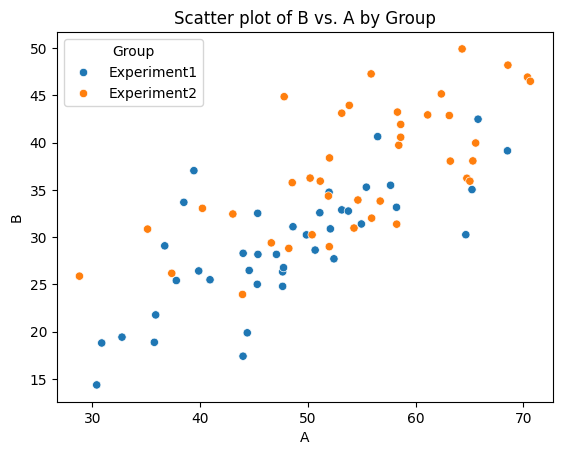

               sum_sq    df          F        PR(>F)
Group      409.070568   1.0  18.709565  4.570192e-05
A         1763.130254   1.0  80.639878  1.458166e-13
A:Group      0.237501   1.0   0.010863  9.172666e-01
Residual  1661.682822  76.0        NaN           NaN
Interaction not significant. Proceeding without interaction term.
               sum_sq    df          F        PR(>F)
Group      409.070568   1.0  18.953035  4.074290e-05
A         1763.130254   1.0  81.689253  1.012162e-13
Residual  1661.920322  77.0        NaN           NaN
                            OLS Regression Results                            
Dep. Variable:                      B   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     72.25
Date:                Mon, 23 Sep 2024   Prob (F-statistic):           2.16e-18
Time:                        10:22:45   Log-Likelihood:       

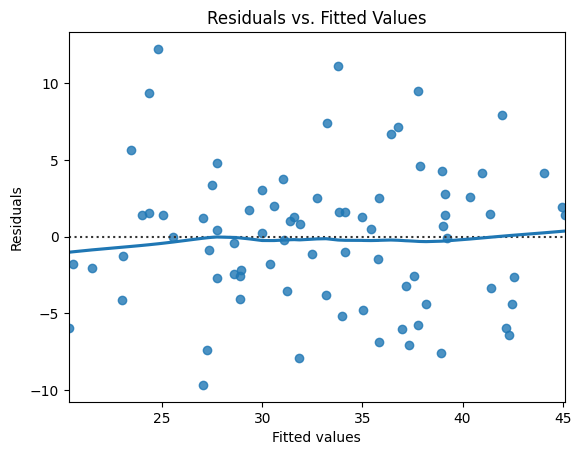

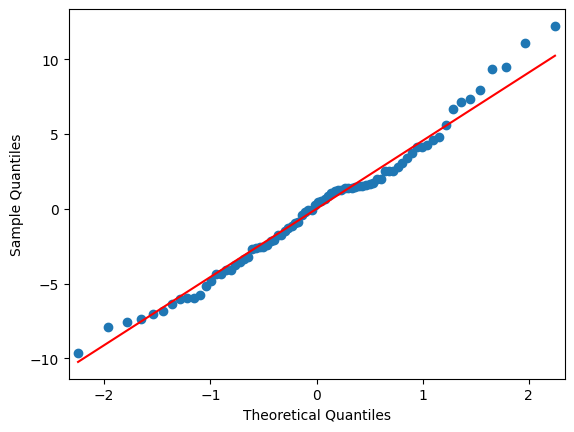

Shapiro-Wilk test statistic: 0.9835345512659741
Shapiro-Wilk p-value: 0.3942912178947833


In [12]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.power import FTestAnovaPower

# Synthetic data generation
np.random.seed(42)

# Define sample sizes
n1 = 40  # Sample size for Experiment1
n2 = 40  # Sample size for Experiment2

# Generate metric A
A1 = np.random.normal(50, 10, n1)
A2 = np.random.normal(55, 10, n2)

# Generate metric B with some group effect
B1 = 0.5 * A1 + np.random.normal(0, 5, n1) + 5
B2 = 0.5 * A2 + np.random.normal(0, 5, n2) + 10

# Create DataFrames
df1 = pd.DataFrame({'A': A1, 'B': B1, 'Group': 'Experiment1'})
df2 = pd.DataFrame({'A': A2, 'B': B2, 'Group': 'Experiment2'})

# Combine DataFrames
df = pd.concat([df1, df2], ignore_index=True)
df['Group'] = df['Group'].astype('category')

# Visualize data
sns.scatterplot(data=df, x='A', y='B', hue='Group')
plt.title('Scatter plot of B vs. A by Group')
plt.show()

# Test for homogeneity of regression slopes
model_interaction = ols('B ~ A * Group', data=df).fit()
anova_table = sm.stats.anova_lm(model_interaction, typ=2)
print(anova_table)

# Check if interaction is significant
interaction_pvalue = anova_table['PR(>F)']['A:Group']
if interaction_pvalue > 0.05:
    print("Interaction not significant. Proceeding without interaction term.")
    # Perform ANCOVA without interaction term
    model = ols('B ~ A + Group', data=df).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    print(anova_table)
else:
    print("Interaction significant. Including interaction term.")
    model = model_interaction  # Use model with interaction

# Analyze results
print(model.summary())

# Check assumptions
# Residuals vs. Fitted
fitted_vals = model.fittedvalues
residuals = model.resid
sns.residplot(x=fitted_vals, y=residuals, lowess=True)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.show()

# Normality of residuals
sm.qqplot(residuals, line='s')
plt.show()
shapiro_test = stats.shapiro(residuals)
print('Shapiro-Wilk test statistic:', shapiro_test.statistic)
print('Shapiro-Wilk p-value:', shapiro_test.pvalue)

# Learning how to do cross partitioner comparison 2

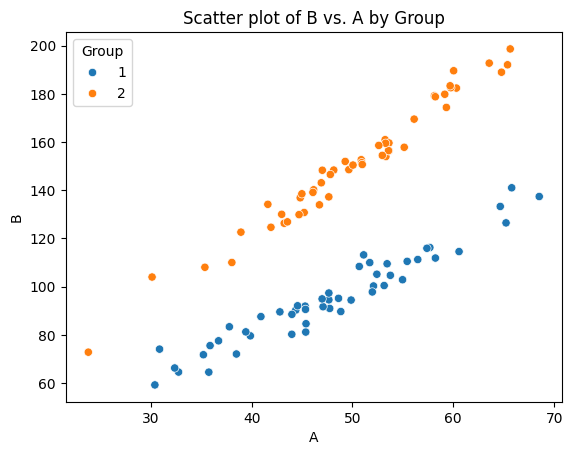

KeyError: 'Group_Experiment2'

In [35]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Generate synthetic data
np.random.seed(42)

# Sample sizes
n1 = 50
n2 = 50

# Generate metric A
A1 = np.random.normal(50, 10, n1)
A2 = np.random.normal(50, 10, n2)

# Generate metric B
# Experiment1: B = 2*A + error
B1 = 2 * A1 + np.random.normal(0, 5, n1)

# Experiment2: B = 3*A + error
B2 = 3 * A2 + np.random.normal(0, 5, n2)

# Create DataFrames
df1 = pd.DataFrame({'A': A1, 'B': B1})
df2 = pd.DataFrame({'A': A2, 'B': B2})

# Add Group indicator
df1['Group'] = 1
df2['Group'] = 2

# Combine DataFrames
df = pd.concat([df1, df2], ignore_index=True)
df['Group'] = df['Group'].astype('category')

# Visualize data
sns.scatterplot(data=df, x='A', y='B', hue='Group')
plt.title('Scatter plot of B vs. A by Group')
plt.show()

# Encode the Group variable
df = pd.get_dummies(df, columns=['Group'], drop_first=True)

# Create interaction term
df['A_Group'] = df['A'] * df['Group_Experiment2']

# Define independent variables
X = df[['A', 'Group_Experiment2', 'A_Group']]
X = sm.add_constant(X)

# Define dependent variable
y = df['B']

# Fit regression model
model = sm.OLS(np.asarray(y), X).fit()

# View model summary
print(model.summary())

# Check assumptions
# Residuals vs. Fitted
fitted_vals = model.fittedvalues
residuals = model.resid
sns.residplot(x=fitted_vals, y=residuals, lowess=True)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.show()

# Normality of residuals
sm.qqplot(residuals, line='45')
plt.show()
shapiro_test = stats.shapiro(residuals)
print('Shapiro-Wilk test statistic:', shapiro_test.statistic)
print('Shapiro-Wilk p-value:', shapiro_test.pvalue)

# Homoscedasticity
bp_test = het_breuschpagan(residuals, X)
print('Breusch-Pagan test statistic:', bp_test[0])
print('Breusch-Pagan p-value:', bp_test[1])

# Multicollinearity
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

# Visualize regression lines
# Need to map Group_Experiment2 back to original group labels for plotting
df['Group'] = df['Group_Experiment2'].map({0: 'Experiment1', 1: 'Experiment2'})
sns.lmplot(x='A', y='B', hue='Group', data=df, markers=['o', 'x'], palette='Set1', ci=None)
plt.title('Regression Lines for Each Group')
plt.show()

# Cross Partitioners Comparision

Is there a way of infering acc from training from one partitioning scheme based on the heterogeneity metrics.

In [13]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
import matplotlib.pyplot as plt

In [22]:
pathological_df = res_dict[("cifar10", "IidPartitioner")].dropna()
dirichlet_df = res_dict[("cifar10", "DirichletPartitioner")].dropna()

In [23]:
pathological_df["partitioner"] = "PathologicalPartitioner"
dirichlet_df["partitioner"] = "DirichletPartitioner"
df = pd.concat([pathological_df, dirichlet_df])[["metric_value", "eval/acc", "partitioner"]]
df

/tmp/ipykernel_1988357/3901376891.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dirichlet_df["partitioner"] = "DirichletPartitioner"


,metric_value,eval/acc,partitioner
0,0.006195,0.6088,PathologicalPartitioner
1,0.014177,0.5715,PathologicalPartitioner
2,0.023834,0.5258,PathologicalPartitioner
3,0.045574,0.4874,PathologicalPartitioner
4,0.079977,0.4839,PathologicalPartitioner
5,0.155471,0.4433,PathologicalPartitioner
0,0.520317,0.5169,DirichletPartitioner
1,0.388491,0.5492,DirichletPartitioner
2,0.249940,0.5990,DirichletPartitioner
3,0.141503,0.6099,DirichletPartitioner


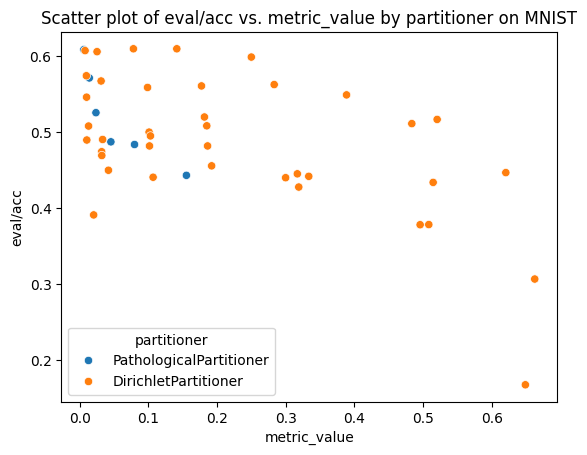

In [24]:
import seaborn as sns

sns.scatterplot(data=df, x='metric_value', y='eval/acc', hue='partitioner')
plt.title('Scatter plot of eval/acc vs. metric_value by partitioner on MNIST')
plt.show()

In [25]:
df.columns = ["metric_value", "test_acc", "partitioner"]

In [26]:
model_interaction = ols('test_acc ~ metric_value * partitioner', data=df).fit()
anova_table = sm.stats.anova_lm(model_interaction, typ=2)
print(anova_table)

                            sum_sq    df          F    PR(>F)
partitioner               0.000478   1.0   0.096358  0.757817
metric_value              0.107197   1.0  21.611896  0.000034
metric_value:partitioner  0.007482   1.0   1.508408  0.226386
Residual                  0.203364  41.0        NaN       NaN


                            sum_sq    df          F    PR(>F)
partitioner               0.000478   1.0   0.096358  0.757817
metric_value              0.107197   1.0  21.611896  0.000034
metric_value:partitioner  0.007482   1.0   1.508408  0.226386
Residual                  0.203364  41.0        NaN       NaN
Interaction not significant. Proceeding without interaction term.
                sum_sq    df          F    PR(>F)
partitioner   0.000478   1.0   0.095206  0.759186
metric_value  0.107197   1.0  21.353414  0.000036
Residual      0.210846  42.0        NaN       NaN
                            OLS Regression Results                            
Dep. Variable:               test_acc   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.317
Method:                 Least Squares   F-statistic:                     11.23
Date:                Mon, 23 Sep 2024   Prob (F-statistic):           0.000124
Time:                        

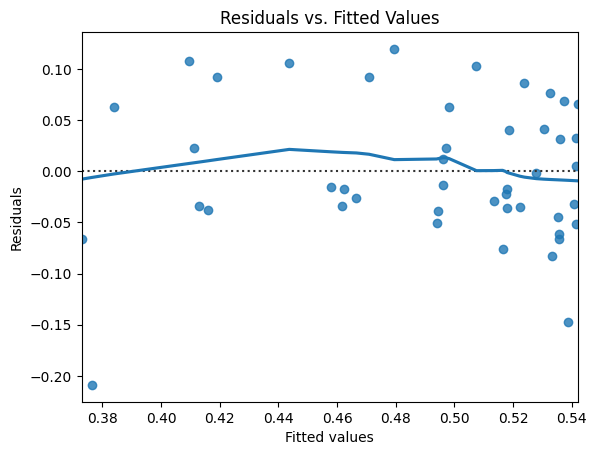

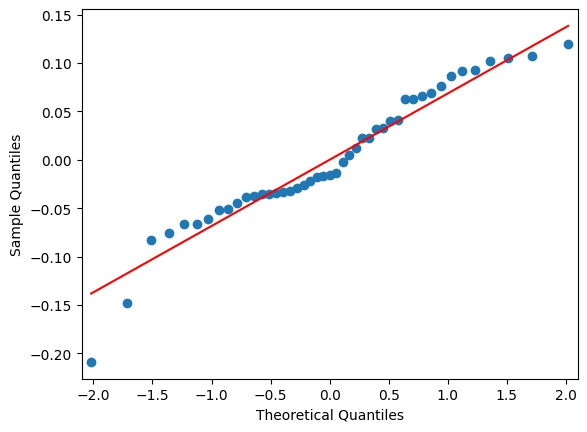

Shapiro-Wilk test statistic: 0.9534392876145992
Shapiro-Wilk p-value: 0.06861713345986872


In [29]:
anova_table = sm.stats.anova_lm(model_interaction, typ=2)
print(anova_table)

# Check if interaction is significant
interaction_pvalue = anova_table['PR(>F)']['metric_value:partitioner']
if interaction_pvalue > 0.05:
    print("Interaction not significant. Proceeding without interaction term.")
    # Perform ANCOVA without interaction term
    model = ols('test_acc ~ metric_value + partitioner', data=df).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    print(anova_table)
else:
    print("Interaction significant. Including interaction term.")
    model = model_interaction  # Use model with interaction

# Analyze results
print(model.summary())

# Check assumptions
# Residuals vs. Fitted
fitted_vals = model.fittedvalues
residuals = model.resid
sns.residplot(x=fitted_vals, y=residuals, lowess=True)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.show()

# Normality of residuals
sm.qqplot(residuals, line='s')
plt.show()
shapiro_test = stats.shapiro(residuals)
print('Shapiro-Wilk test statistic:', shapiro_test.statistic)
print('Shapiro-Wilk p-value:', shapiro_test.pvalue)

<Axes: ylabel='Frequency'>

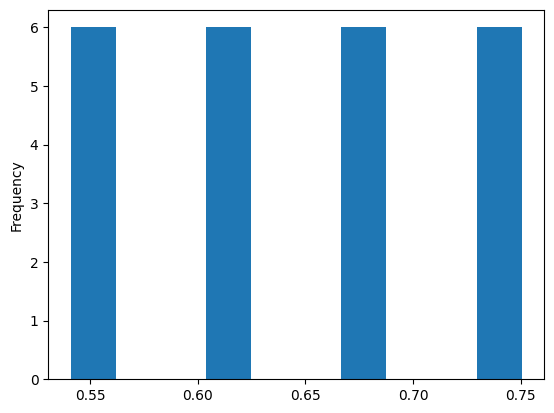

In [29]:
pathological_df["metric_value"].plot.hist()

<Axes: ylabel='Frequency'>

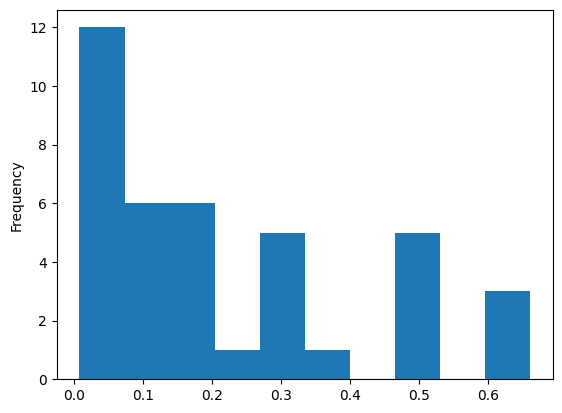

In [30]:
dirichlet_df["metric_value"].plot.hist()

In [31]:
pathological_df['bin'] = pd.cut(pathological_df.loc[:, 'metric_value'], bins=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1], labels=False).astype(int)
dirichlet_df['bin'] = pd.cut(dirichlet_df.loc[:, 'metric_value'],  bins=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1], labels=False).astype(int)

/tmp/ipykernel_645623/1110265417.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dirichlet_df['bin'] = pd.cut(dirichlet_df.loc[:, 'metric_value'],  bins=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1], labels=False).astype(int)


<Axes: xlabel='bin'>

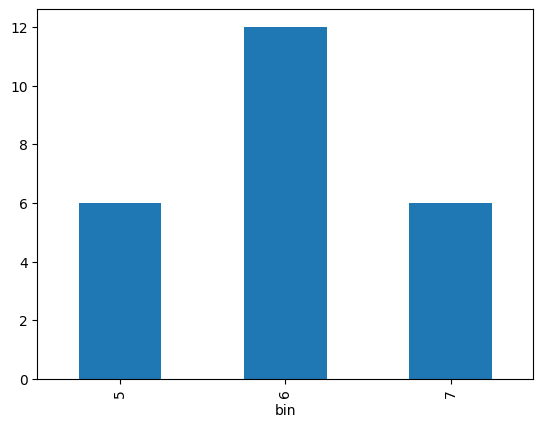

In [34]:
pathological_df['bin'].value_counts().sort_index().plot.bar()

<Axes: xlabel='bin'>

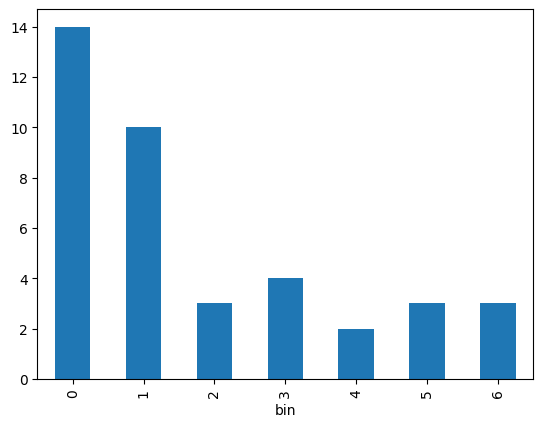

In [35]:
dirichlet_df['bin'].value_counts().sort_index().plot.bar()

In [36]:

# Calculate the correlation for each common bin value
correlations = []
for bin_value in range(5, 6):
    pathological_bin = pathological_df[pathological_df['bin'] == bin_value]
    dirichlet_bin = dirichlet_df[dirichlet_df['bin'] == bin_value]
    correlation = pathological_bin['eval/acc'].corr(dirichlet_bin['eval/acc'])
    correlations.append(correlation)

correlations = np.array(correlations)

# Print the correlations
print(correlations)

[nan]


In [49]:
pathological_df[pathological_df['bin'] == bin_value]['eval/acc']

3     0.8682
7     0.9827
11    0.9809
15    0.9831
19    0.9719
23    0.9519
Name: eval_acc, dtype: float64

In [52]:
dirichlet_df[dirichlet_df['bin'] == bin_value]['eval/acc']

0     0.8843
22    0.9713
29    0.9670
Name: eval_acc, dtype: float64

In [37]:
dirichlet_df

,num_partitions,alpha,eval_acc,metric_value,bin
0,3,0.1,0.8843,0.520301,5
1,3,0.3,0.9863,0.388463,3
2,3,1.0,0.9874,0.250478,2
3,3,3.0,0.9886,0.141928,1
4,3,10.0,0.9907,0.078216,0
5,3,100.0,0.9913,0.025358,0
6,3,1000.0,0.9910,0.008000,0
7,10,0.1,0.9174,0.620323,6
8,10,0.3,0.9888,0.482991,4
9,10,1.0,0.9893,0.282998,2


In [38]:
pathological_df

,num_partitions,num_classes_per_partition,eval_acc,metric_value,bin
0,3,2,0.5725,0.743239,7
1,3,3,0.6383,0.680142,6
2,3,4,0.6797,0.618636,6
3,3,5,0.8682,0.551557,5
4,10,2,0.6746,0.750358,7
5,10,3,0.9392,0.678988,6
6,10,4,0.9660,0.613246,6
7,10,5,0.9827,0.546469,5
8,30,2,0.4091,0.746112,7
9,30,3,0.3563,0.674386,6


In [39]:
pathological_bin

,num_partitions,num_classes_per_partition,eval_acc,metric_value,bin
3,3,5,0.8682,0.551557,5
7,10,5,0.9827,0.546469,5
11,30,5,0.9809,0.542557,5
15,100,5,0.9831,0.541341,5
19,300,5,0.9719,0.541064,5
23,1000,5,0.9519,0.541121,5


In [40]:
dirichlet_bin

,num_partitions,alpha,eval_acc,metric_value,bin
0,3,0.1,0.8843,0.520301,5
22,100,0.3,0.9713,0.507179,5
29,300,0.3,0.9670,0.512800,5
